# Frame Classification using ResNet + LSTM 512

This notebook creates and trains an LSTM based classifier with a dataset build of features of dimenssion 512.

In [1]:
from utils2 import *
import os

%load_ext autoreload
%autoreload 2

## Train models

We will use the best configuration we found with our wandb project

In [2]:
best_config = {
    'abs_path': '../', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'lstm',
    'dropout_rate': 0.5,
    'num_layers': 1,
    'num_units': 128,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'norm' : False,
    'num_heads' : 1,
    'model_name' : 'lstm512'
}

## Final model Training & Evaluation

(307, 300, 512) (307, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Grooming
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7607 - fn: 2510.3000 - fp: 12737.2002 - loss: 0.6177 - prc: 0.1768 - precision: 0.1579 - recall: 0.3730 - tn: 34462.1016 - tp: 2700.3999   
Epoch 1: val_loss improved from inf to 0.33848, saving model to lstm512_grooming.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.7509 - fn: 2591.1819 - fp: 14183.4541 - loss: 0.6185 - prc: 0.1830 - precision: 0.1597 - recall: 0.3978 - tn: 36223.7266 - tp: 3019.8181 - val_accuracy: 0.9007 - val_fn: 1718.0000 - val_fp: 1916.0000 - val_loss: 0.3385 - val_prc: 0.4982 - val_precision: 0.4889 - val_recall: 0.5162 - val_tn: 31133.0000 - val_tp: 1833.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8012 - fn: 1559.7000 - fp: 9360.7002 - loss: 0.5252 - prc: 0.4392 - precision: 0.3514 - recall: 0.7089 - tn: 37279.6992 - tp: 4209.8999
Epoch 2: val_loss did not improve from 0.33

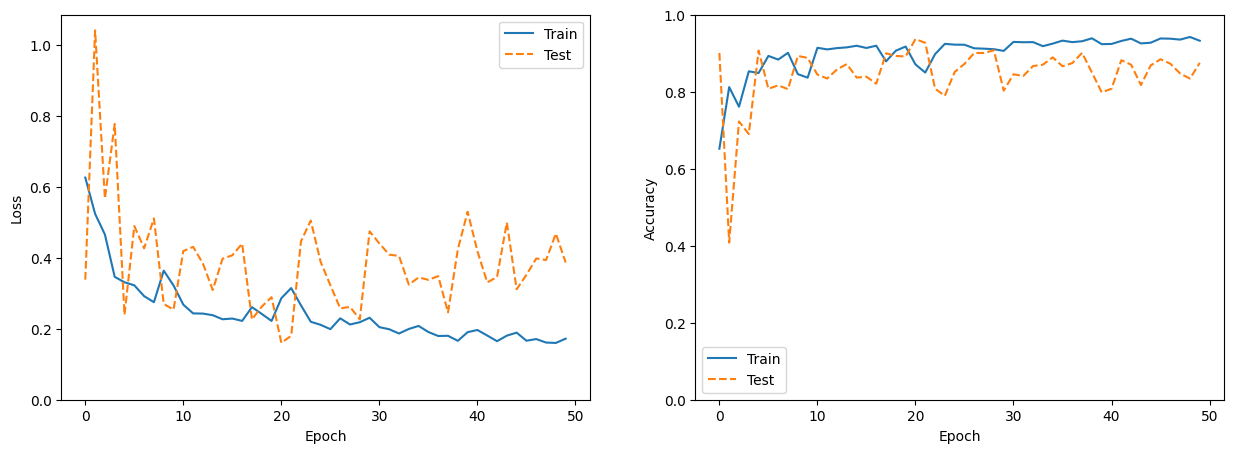

10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step 


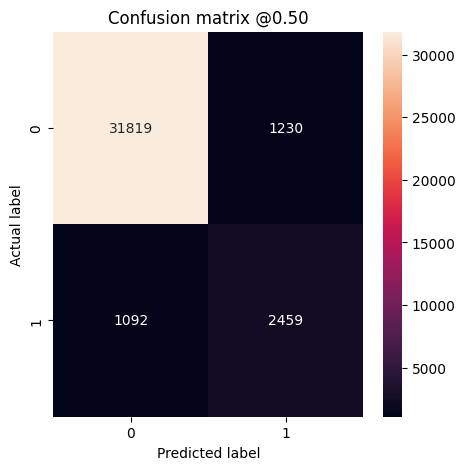

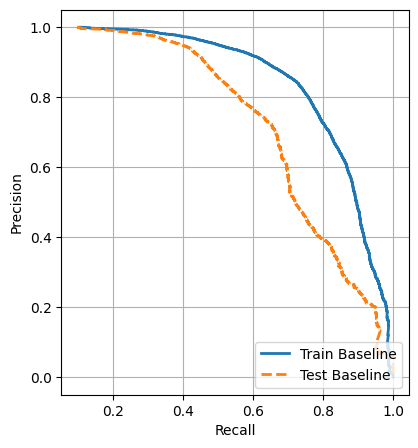

Running experiment for Rearing


/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:379: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4567 - fn: 5286.3999 - fp: 22943.9004 - loss: 0.7234 - prc: 0.2906 - precision: 0.2553 - recall: 0.5976 - tn: 16066.2998 - tp: 8113.3999
Epoch 1: val_loss improved from inf to 0.58686, saving model to lstm512_rearing.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 95s 8s/step - accuracy: 0.4591 - fn: 5672.2729 - fp: 24327.0918 - loss: 0.7222 - prc: 0.2923 - precision: 0.2573 - recall: 0.5984 - tn: 17311.8184 - tp: 8707.0000 - val_accuracy: 0.8985 - val_fn: 2924.0000 - val_fp: 790.0000 - val_loss: 0.5869 - val_prc: 0.3248 - val_precision: 0.4946 - val_recall: 0.2091 - val_tn: 32113.0000 - val_tp: 773.0000
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6671 - fn: 4836.7002 - fp: 13987.5000 - loss: 0.6627 - prc: 0.5115 - precision: 0.4464 - recall: 0.5912 - tn: 24464.0996 - tp: 9121.7002
Epoch 2: val_loss improved from 0.58686 to 0.49882, saving model to lstm512_rearing.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy:

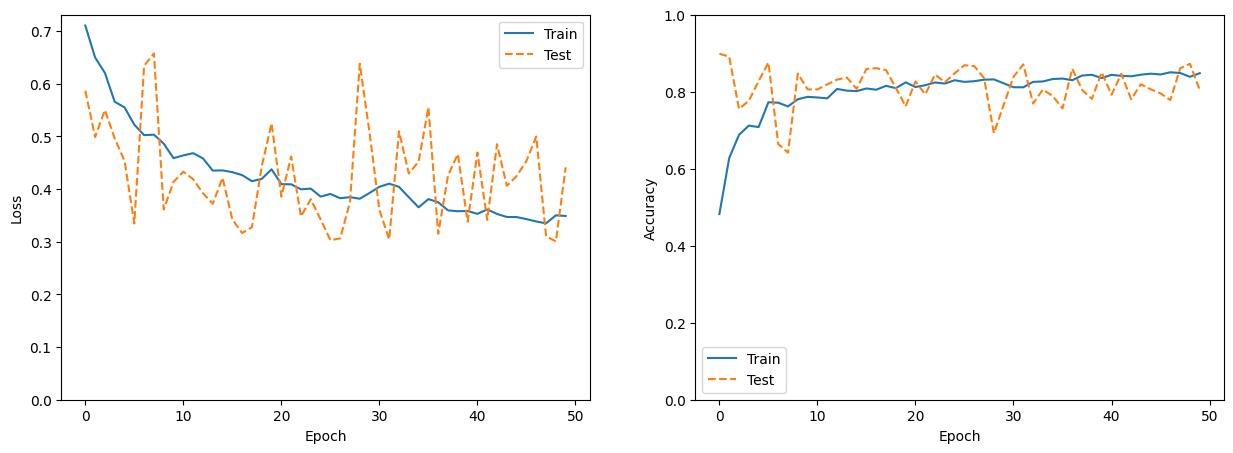

10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step 


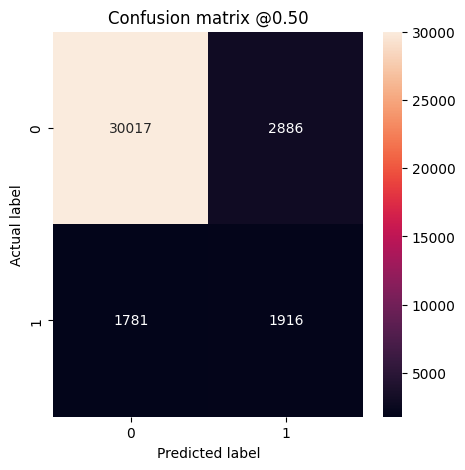

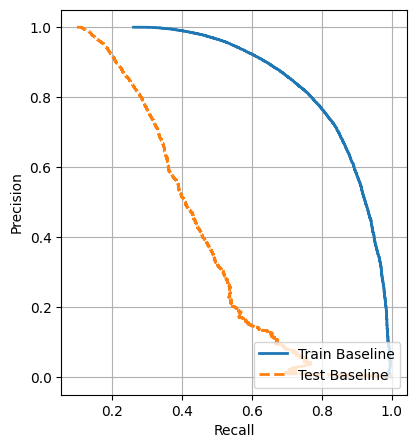

In [3]:
metrics = train_test_model(best_config)

## Evaluate model

On the following section we will evaluate the model on the validation set. 

In [4]:
from evaluation_utils import *
import keras

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Load validation data
path = '../data/processed/Dataset/'
val_data = load_dataset(path, 'resnet')
print('Validation videos: ', val_data.keys())

# Per each video, generate sequences
val_seq = {}
for i in list(val_data.keys()):
    X, Y = generate_sequences(val_data[i], 300)
    val_seq[i] = [X, Y]

behaviours = ['Grooming', 'Rearing']

# We will load the models
if 'Grooming' in behaviours:
    model_grooming = keras.models.load_model('lstm512_grooming.keras', compile=True)
if 'Rearing' in behaviours:
    model_rearing = keras.models.load_model('lstm512_rearing.keras', compile=True)

# Initialzie dataframes to save metrics
df_g = pd.DataFrame(columns=['Accuracy','Precision','Recall','PRC'], index=list(val_data.keys()))
df_r = pd.DataFrame(columns=['Accuracy','Precision','Recall','PRC'], index=list(val_data.keys()))

Validation videos:  dict_keys(['1', 'Animal62418', 'HD_ChR2_480A'])


In [14]:
df_g

,Accuracy,Precision,Recall,PRC
1,0.980513,0.909091,0.357143,0.788551
Animal62418,0.94381,0.0,0.0,0.201526
HD_ChR2_480A,0.932464,0.910873,0.736311,0.901679


In [15]:
df_r

,Accuracy,Precision,Recall,PRC
1,0.975897,0.4,0.540541,0.562739
Animal62418,0.582381,0.252358,0.900105,0.599896
HD_ChR2_480A,0.888986,0.716501,0.559205,0.677779


### Results video 1.mp4

In [8]:
X, Y = val_seq['1']

# Add metrics to DataFrame
df_g.loc['1'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['1'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.9805 - fn: 72.0000 - fp: 4.0000 - loss: 0.0521 - prc: 0.7886 - precision: 0.9091 - recall: 0.3571 - tn: 3784.0000 - tp: 40.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step - accuracy: 0.9759 - fn: 34.0000 - fp: 60.0000 - loss: 0.0761 - prc: 0.5627 - precision: 0.4000 - recall: 0.5405 - tn: 3766.0000 - tp: 40.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step


We will start by plotting the labels and actual predictions along the video frames.


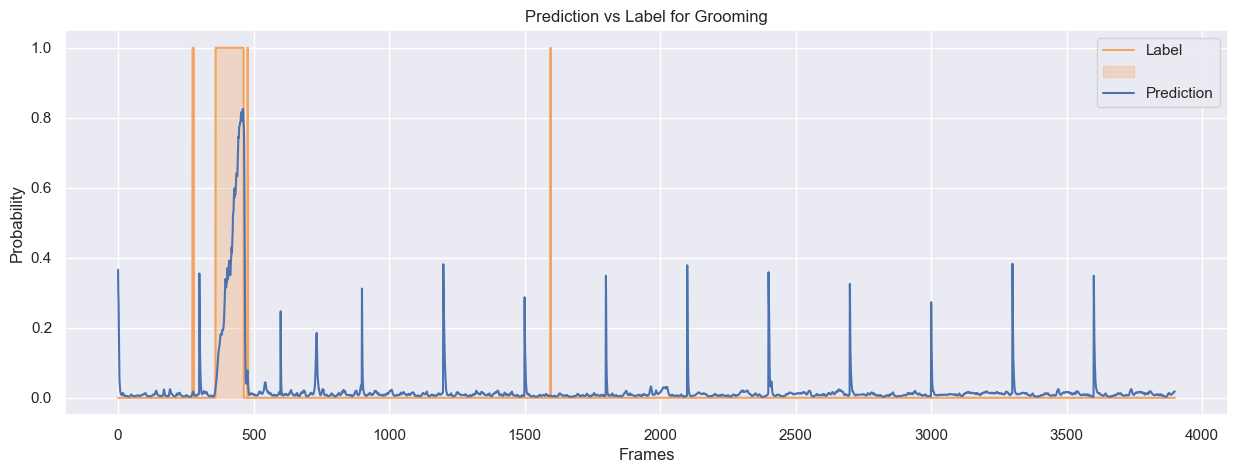

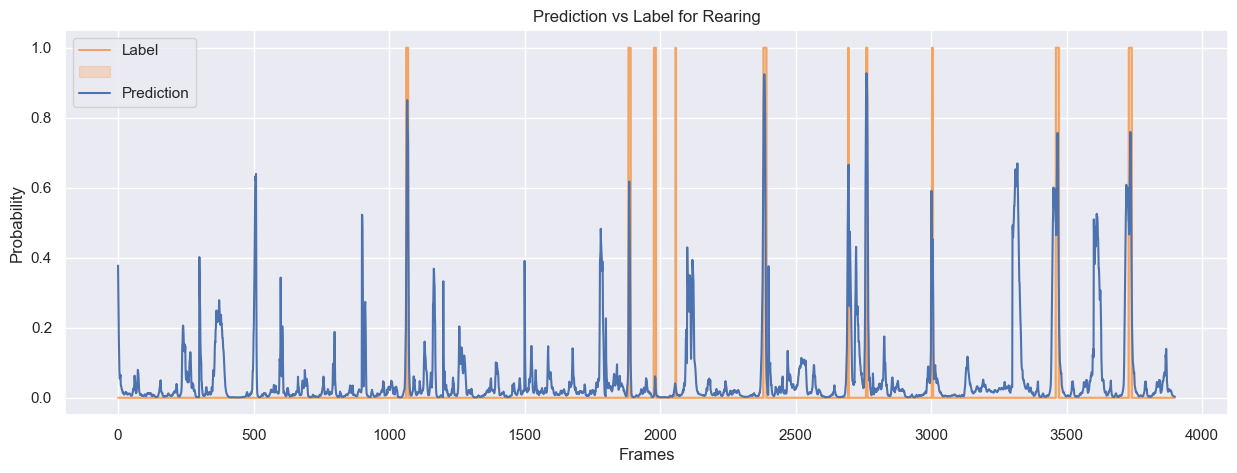

We will compute the PRC curve to choose the best threshold.


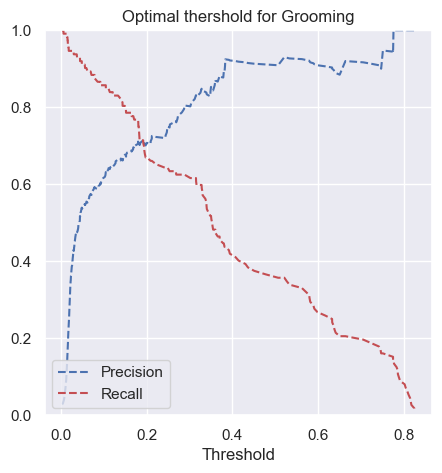

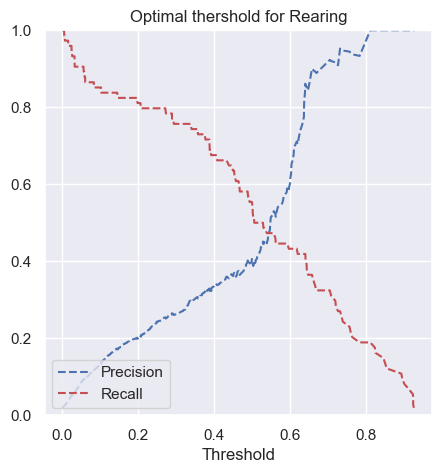

Lastly we will plot the confussion matrix for each behaviour


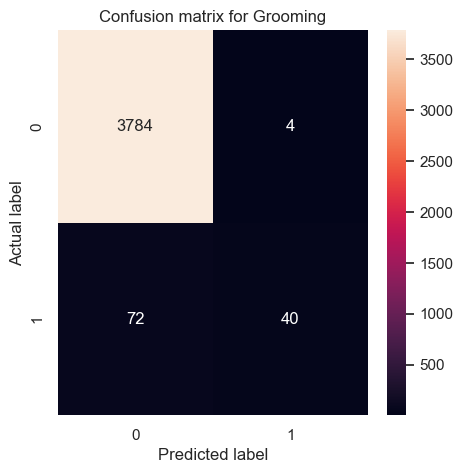

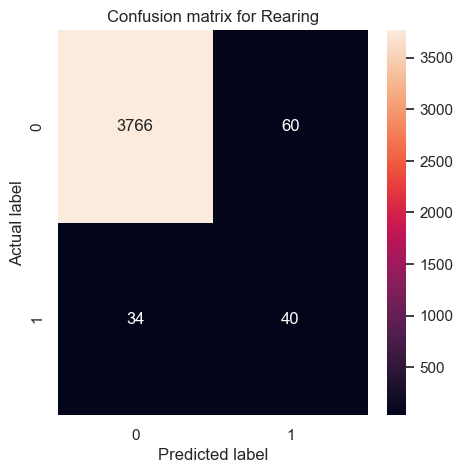

In [9]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video Animal62418.mp4

In [10]:
X, Y = val_seq['Animal62418']

# Add metrics to DataFrame
df_g.loc['Animal62418'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['Animal62418'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.9438 - fn: 354.0000 - fp: 0.0000e+00 - loss: 0.2019 - prc: 0.2015 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 5946.0000 - tp: 0.0000e+00
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5824 - fn: 95.0000 - fp: 2536.0000 - loss: 0.7714 - prc: 0.5999 - precision: 0.2524 - recall: 0.9001 - tn: 2813.0000 - tp: 856.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


We will start by plotting the labels and actual predictions along the video frames.


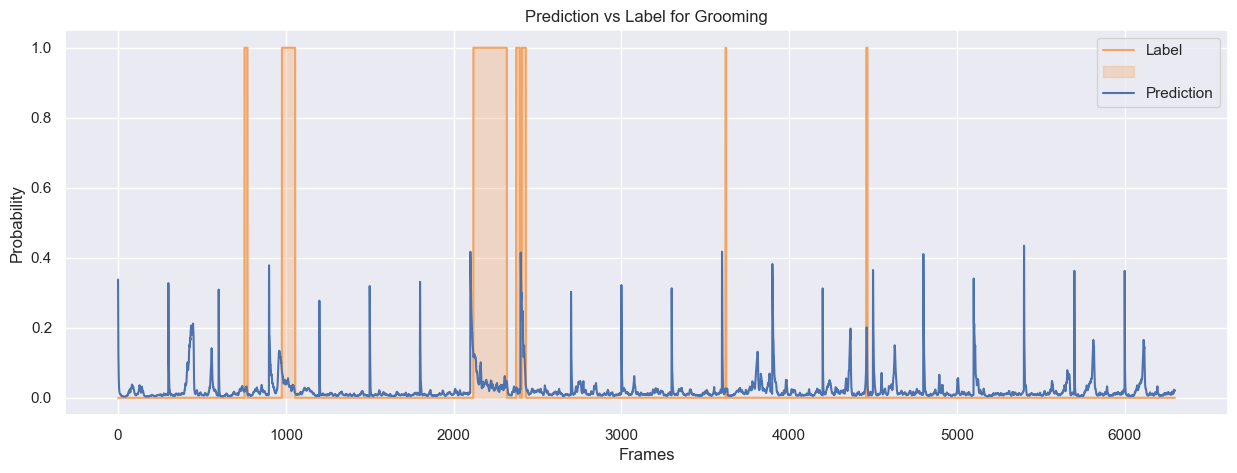

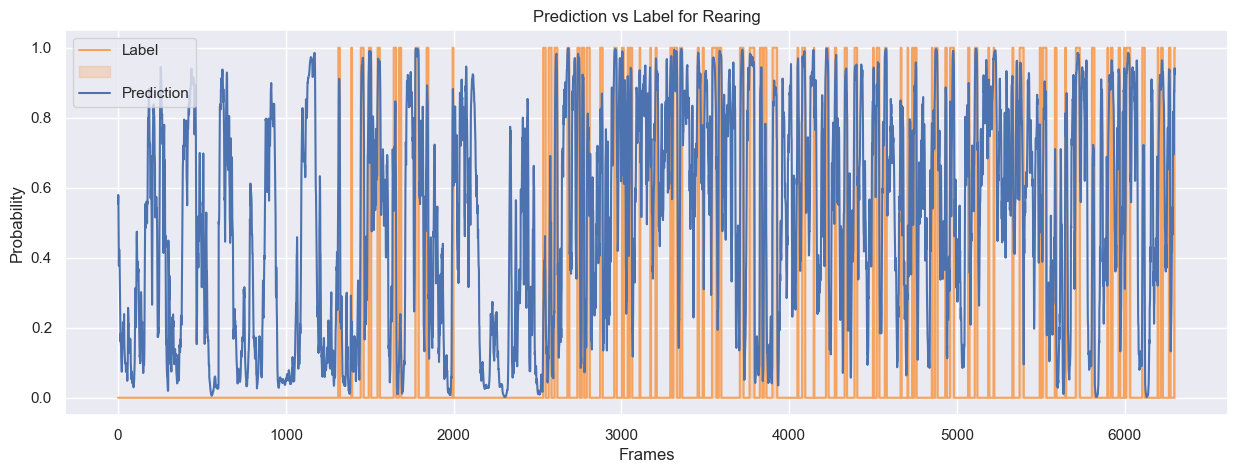

We will compute the PRC curve to choose the best threshold.


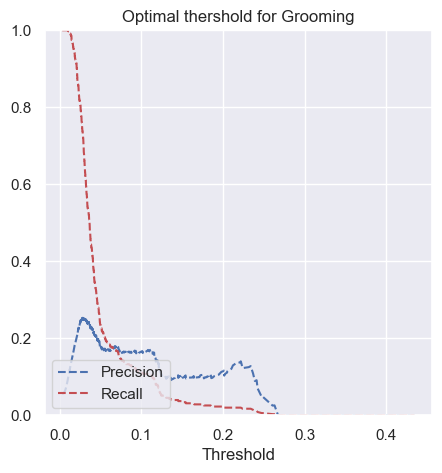

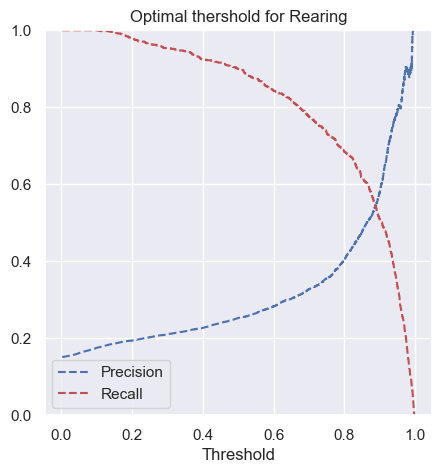

Lastly we will plot the confussion matrix for each behaviour


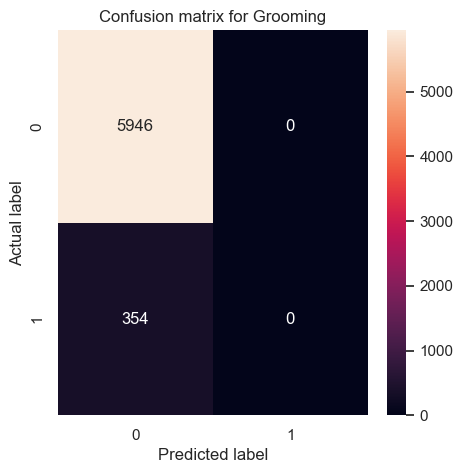

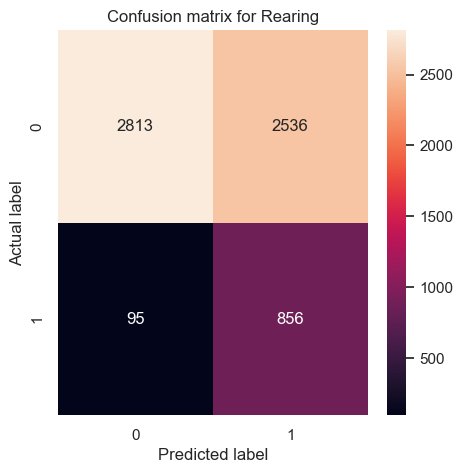

In [11]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video HD_ChR2_480A.mp4

In [12]:
X, Y = val_seq['HD_ChR2_480A']

# Add metrics to DataFrame
df_g.loc['HD_ChR2_480A'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['HD_ChR2_480A'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.9325 - fn: 366.0000 - fp: 100.0000 - loss: 0.2000 - prc: 0.9017 - precision: 0.9109 - recall: 0.7363 - tn: 5412.0000 - tp: 1022.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8890 - fn: 510.0000 - fp: 256.0000 - loss: 0.2855 - prc: 0.6778 - precision: 0.7165 - recall: 0.5592 - tn: 5487.0000 - tp: 647.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


We will start by plotting the labels and actual predictions along the video frames.


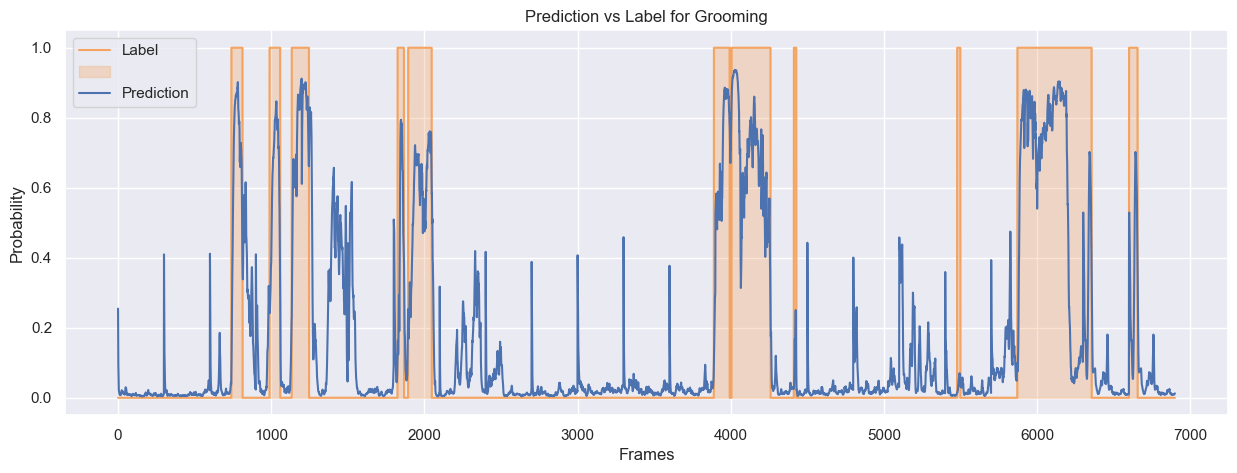

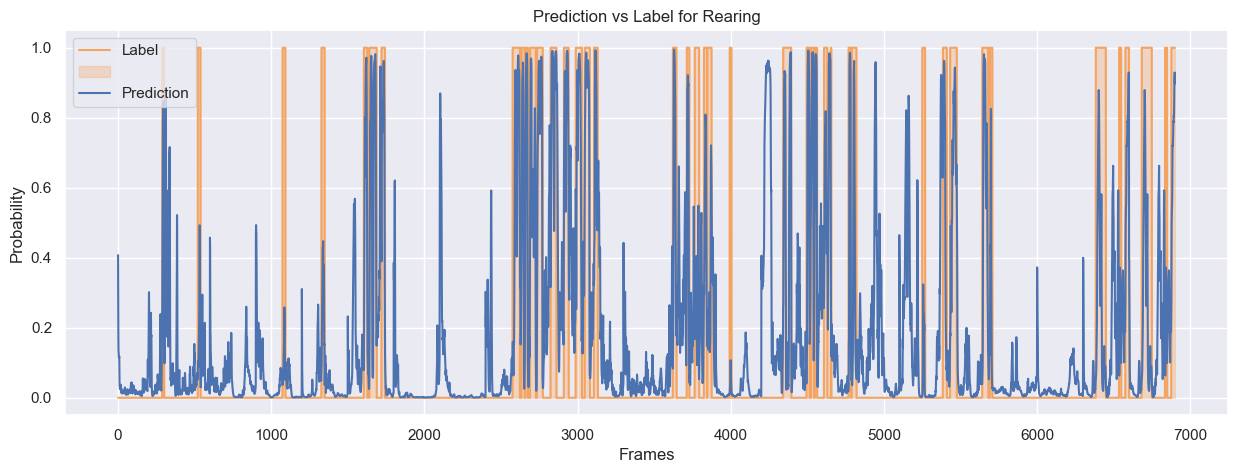

We will compute the PRC curve to choose the best threshold.


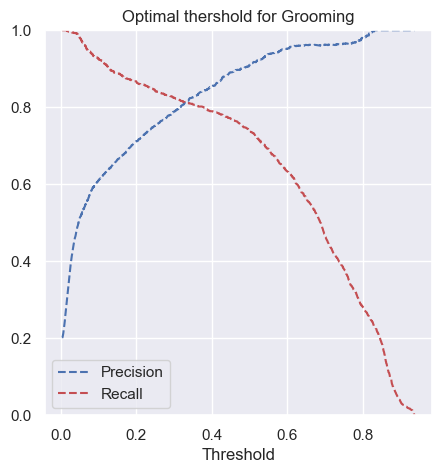

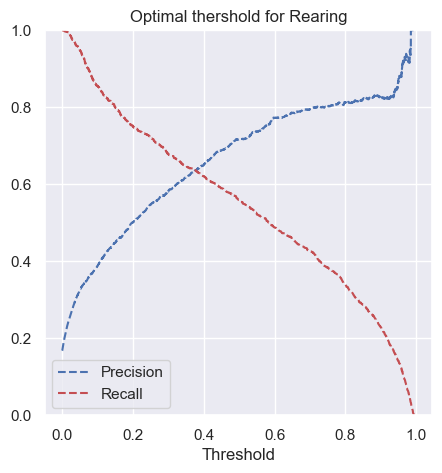

Lastly we will plot the confussion matrix for each behaviour


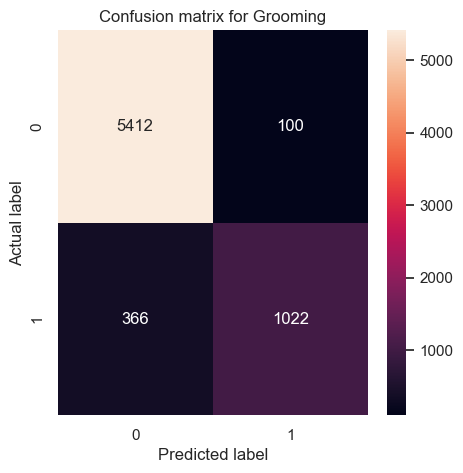

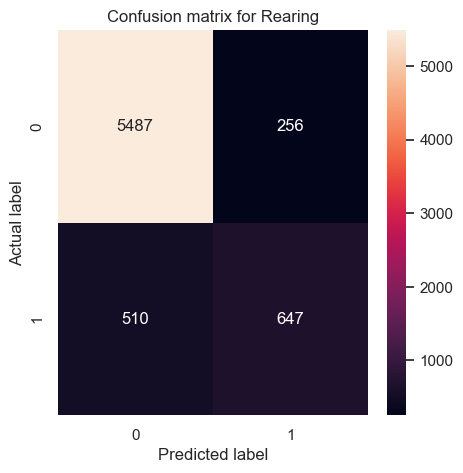

In [13]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)